# House price prediction using advanced regression techniques

**Kaggle competition**

## Part I - Loading libraries and data

In [1]:
# import data manipulation and data viz packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# silence any warnings
import warnings
warnings.filterwarnings("ignore")

# import pandas profiling
from pandas_profiling import ProfileReport

# import modeling functions
from sklearn.impute import SimpleImputer

In [2]:
# read csv files
df = pd.read_csv("data/train.csv")

# read csv files
df_test = pd.read_csv("data/test.csv")

In [3]:
# print dimensions of the df
print("we have {} rows and {} columns" .format(df.shape[0], df.shape[1]))

we have 1460 rows and 81 columns


In [4]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


It seems that we have some missing values in the dataframe!

The dataframe contains about 1,4K rows and 81 features including the target variable $y$ which is called SalePrice

## Part II - Exploratpry data analysis

### Handling high numbers of missing values before any exploration

In [5]:
# describe the continous variables of the dataframe
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# display the sum of missing values of each column
nas = df.isna().sum().sort_values(ascending=False)[:20]
nas

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

It seems that some columns are almost all missing values such as the first 6 displayed above. We will drop them moving on since there is no way to accurately impute them

In [7]:
# get columns to drop
cols_to_drop = nas.index[:6].to_list()
print(cols_to_drop)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']


In [8]:
# remove columns with many NAs + id column and assign it to a new variable
df_features = df.drop(axis = 1, labels = cols_to_drop + ["Id", "SalePrice"])

In [9]:
# check the other missing values (low numbers)
cols_to_explore = df_features.isna().sum().sort_values(ascending=False)[:13]
print(cols_to_explore)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64


### Filling the rest of the missing values using mode for categorical data and median for numerical data

In [10]:
# first get all numerical variables to see if we have cardinal variables included
df_num = df_features.select_dtypes(include=np.number)

# get number of unique values of the numerical data
nunique = df_num.nunique().sort_values(ascending=True)
print(nunique)
print("\nWe have {} supposedly numerical features!" .format(df_num.shape[1]))

HalfBath            3
BsmtHalfBath        3
FullBath            4
Fireplaces          4
KitchenAbvGr        4
BsmtFullBath        4
GarageCars          5
YrSold              5
PoolArea            8
BedroomAbvGr        8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
dtype: int64

We have 35 supposedly numerical features!


In [11]:
# get all variables with unique number of less than 25 and make them categorical instead
cols_to_transform = nunique[:18].index

# transform them to categorical variables (strings!)
df_features[cols_to_transform] = df_features[cols_to_transform].astype(str)

In [18]:
# get the new numeric dataframe
df_numeric = df_features.select_dtypes(include=np.number)

# get categorical dataframe 
df_cat = df_features.select_dtypes(include=np.object0)

# print number of features and make sur their sum is correct
print("We have {} true numerical features and {} categorical features!" .format(df_numeric.shape[1], df_cat.shape[1]))

We have 17 true numerical features and 56 categorical features!


In [32]:
# get median imputer
imputer_num = SimpleImputer(strategy="median")
imputer_cat = SimpleImputer(strategy="most_frequent")

# fit imputer to the data
imputer_num.fit(df_numeric)
imputer_cat.fit(df_cat)

# transform both dataframes to fill missing values
df_numeric_filled = pd.DataFrame(imputer_num.transform(df_numeric), columns = df_numeric.columns, index = df_numeric.index)
df_cat_filled = pd.DataFrame(imputer_cat.transform(df_cat), columns = df_cat.columns, index = df_cat.index)

# check wether we have NAs left
if not df_numeric_filled.isna().sum().any() and not df_cat_filled.isna().sum().any():
    print("All missing values have been imputer successfully")

All missing values have been imputer successfully


In [38]:
# join the two dataframes to form one single training dataframe
df_filled = df_numeric_filled.join(df_cat_filled)
df_filled.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,...,TA,TA,Y,0,0,0,2,2008,WD,Normal
1,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,...,TA,TA,Y,0,0,0,5,2007,WD,Normal
2,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,...,TA,TA,Y,0,0,0,9,2008,WD,Normal
3,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,...,TA,TA,Y,0,0,0,2,2006,WD,Abnorml
4,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,...,TA,TA,Y,0,0,0,12,2008,WD,Normal


### Exploring some variables

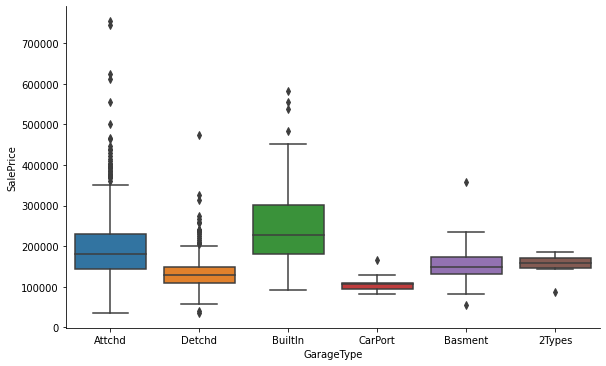

In [43]:
# plot box plot of categorical variables
df_to_plot = df_filled.join(df.loc[:, ["SalePrice"]])
sns.catplot(x="GarageType", y="SalePrice", kind="box", aspect=10/6, data = df_to_plot);

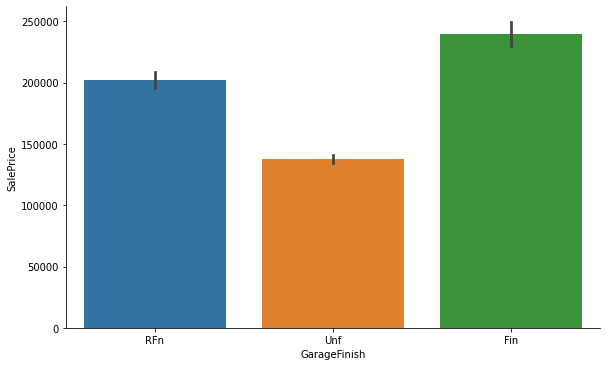

In [46]:
sns.catplot(x="GarageFinish", y="SalePrice", kind="bar", data=df_to_plot, aspect=10/6);

### Exploring all variables with profiler

In [ ]:
# create a html report on all our variables
profile = ProfileReport(df_to_plot, title='House price profiling report')

# we save the html report on results directory
profile.to_file("./results/univariate_report.html")

### Exploring correlations with the target variable

In [47]:
corr_matrix = df_to_plot.corr()

In [48]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotArea          0.263843
BsmtUnfSF        0.214479
ScreenPorch      0.111447
BsmtFinSF2      -0.011378
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64

### Exploring correlations between the features for colinearity

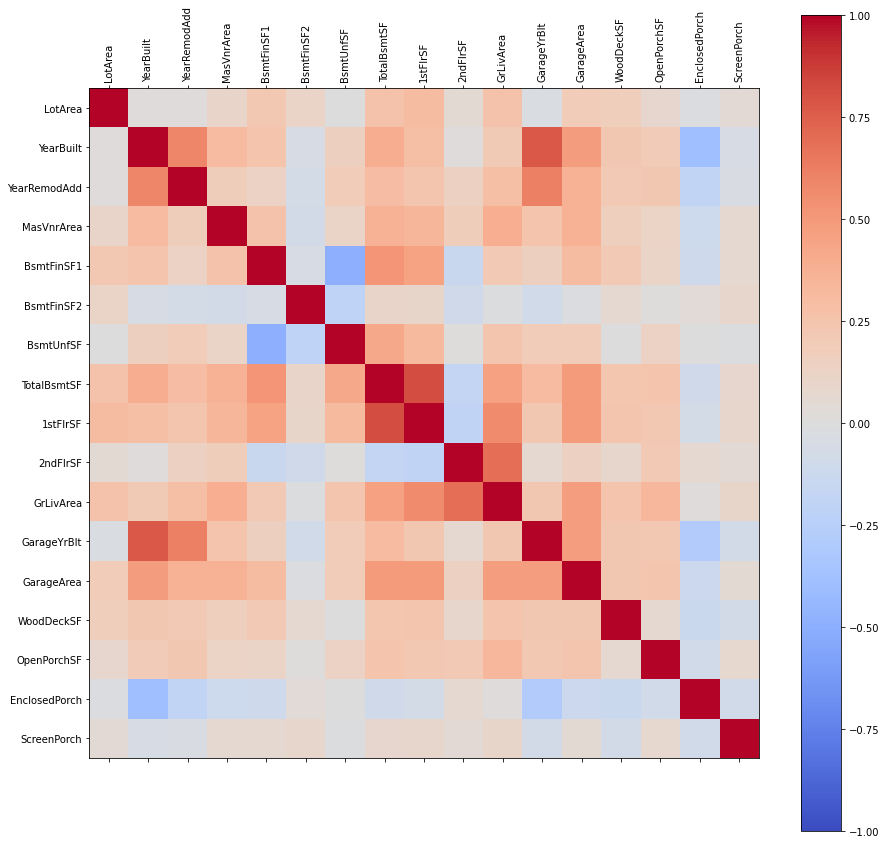

In [53]:
corr = df_numeric_filled.corr()
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_numeric_filled.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_numeric_filled.columns)
ax.set_yticklabels(df_numeric_filled.columns)
plt.show()

We seem to have some numerical variables that are slightly correlated

## Part III - Modeling

We appear to have some outliers and some correlated features. Linear regression would not be a good fit. We could first try a random forest, an xgboost and support vector machines with an rmse error with regards to the target variable